In [38]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os

In [42]:
train_image_features_path = '../data/GOD/image_features_train.npy'
test_image_features_path = '../data/GOD/image_features.npy'

train_category_path = '../data/GOD/category_train.csv'
test_category_path = '../data/GOD/category_test.csv'


target_dir = '/home/yainoue/meg2image/results/20230424_sbj01_seq2stat/inference_last'
test_labels_path = os.path.join(target_dir, 'labels_test.npy')
test_pred_features_path = os.path.join(target_dir, 'pred_features_test.npy')
train_labels_path = os.path.join(target_dir, 'labels_train.npy')
train_pred_features_path = os.path.join(target_dir, 'pred_features_train.npy')

In [43]:
def normalize_unit(data):
    assert len(data.shape)==2
    data -= np.mean(data, axis=0, keepdims=True)
    data /= np.std(data, axis=0, keepdims=True)
    return data

In [44]:
with open(train_category_path) as f:
    reader = csv.reader(f)
    train_cat = []
    for r in reader:
        train_cat += r
with open(test_category_path) as f:
    reader = csv.reader(f)
    test_cat = []
    for r in reader:
        test_cat += r
        
train_image_features = np.load(train_image_features_path)
test_image_features = np.load(test_image_features_path)

#### preprocess :: Normalize unit
train_image_features = normalize_unit(train_image_features)
test_image_features = normalize_unit(test_image_features)

test_pred_features = np.load(test_pred_features_path)
test_labels = np.load(test_labels_path)

train_pred_features = np.load(train_pred_features_path)
train_labels = np.load(train_labels_path)

train_pred_cats = []
for c in train_labels:
    id_ = (c-1)//8
    train_pred_cats.append(train_cat[id_])
test_pred_cats = []
for c in test_labels:
    test_pred_cats.append(test_cat[c-1])

In [45]:
train_cat_image_features_avg = []
for i in range(int(len(train_image_features)/8)):
    start = i * 8
    end = (i+1) * 8
    cat_avg = np.mean(train_image_features[start:end,:], axis=0, keepdims=True)
    train_cat_image_features_avg.append(cat_avg)
    
train_cat_image_features_avg = np.concatenate(train_cat_image_features_avg, axis=0)


test_labels_unique = np.unique(test_labels)
test_pred_features_avg = []
for i in range(len(test_labels_unique)):
    target_ids = test_labels== i+1
    test_pred_features_avg.append(test_pred_features[target_ids].mean(axis=0, keepdims=True))
test_pred_features_avg = np.concatenate(test_pred_features_avg, axis=0)

In [46]:
test_pred_features_avg

array([[ 0.0737129 ,  0.00800417,  0.29163626, ..., -0.11367942,
         0.24112527,  0.11401773],
       [-0.02400985,  0.01886728,  0.15357943, ..., -0.08994468,
         0.17082246,  0.3688583 ],
       [ 0.11331943,  0.0825274 ,  0.14358854, ..., -0.04559408,
        -0.01320413,  0.1258209 ],
       ...,
       [-0.10204086,  0.17790724,  0.27835932, ..., -0.10105278,
         0.11724067,  0.06800354],
       [-0.02197863,  0.0199519 ,  0.12269657, ..., -0.12707402,
         0.03782939,  0.21473432],
       [ 0.01886247,  0.07770255,  0.16893516, ..., -0.04155928,
         0.08676813,  0.29382455]], dtype=float32)

In [47]:
test_pred_features[test_labels==1].mean(axis=0, keepdims=True)

array([[ 7.37129003e-02,  8.00416898e-03,  2.91636258e-01,
         6.39493624e-03,  3.35210748e-02,  3.33232693e-02,
        -9.08781067e-02, -6.53721020e-02,  9.26987305e-02,
         4.81479205e-02,  1.98483869e-01,  2.04652905e-01,
        -7.18234777e-02,  1.81458876e-01,  5.24952114e-02,
         1.55048072e-01,  4.75947447e-02,  1.29382685e-01,
         5.68065010e-02,  6.99454471e-02,  4.46319617e-02,
         5.40106976e-03, -8.30090512e-03,  1.97914317e-02,
         2.83511072e-01, -4.41207230e-04,  1.43193856e-01,
         3.26382875e-01,  2.59238109e-02,  2.49907508e-01,
         9.54470411e-02,  3.12354118e-02,  2.33257711e-01,
        -1.30869932e-02, -6.02083467e-02,  7.88743868e-02,
         2.05861509e-01,  5.76667301e-02, -4.98782247e-02,
        -1.38735920e-02,  4.83017862e-02,  2.52061307e-01,
         3.88783105e-02,  1.43438550e-02,  2.79669553e-01,
        -9.69504192e-02, -7.64285997e-02,  1.10829927e-01,
         9.61722136e-02,  1.10152839e-02,  7.54455253e-0

# Train Image (AVG) vs Test Image

[[ 1.          0.14448165  0.19268592 ... -0.13486348 -0.21210947
  -0.1698305 ]
 [ 0.14448165  1.          0.91250556 ... -0.11322869 -0.08779042
  -0.08709269]
 [ 0.19268592  0.91250556  1.         ... -0.12676909 -0.09600682
  -0.08757214]
 ...
 [-0.13486348 -0.11322869 -0.12676909 ...  1.          0.19233846
   0.11884173]
 [-0.21210947 -0.08779042 -0.09600682 ...  0.19233846  1.
   0.19470739]
 [-0.1698305  -0.08709269 -0.08757214 ...  0.11884173  0.19470739
   1.        ]]


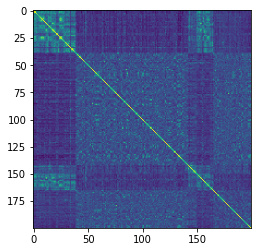

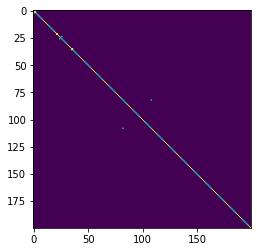

In [48]:
total_image_features = np.concatenate([train_cat_image_features_avg, test_image_features], axis=0)
total_labels = train_cat + test_cat
corr = np.corrcoef(total_image_features)
print(corr)

plt.imshow(corr)
plt.show()
plt.imshow((corr>0.8).astype(np.int8))
plt.show()

In [49]:
ranking = np.argsort(corr, axis=1)[:,::-1]

# test corr
for row in ranking[-50:]:
    print(total_labels[row[0]], ':' ,[total_labels[r] for r in row[1:6]])

Goldfish : ['octopus', 'turtle', 'starfish', 'dolphin', 'frog_1']
owl : ['leopard', 'raccoon', 'ostrich', 'frog_2', 'bird_2']
nan : ['frog_1', 'snake', 'frog_2', 'praying_mantis', 'grasshopper']
duck : ['duck', 'bird_2', 'crested_ibis', 'penguin', 'bird_1']
swan : ['duck', 'crested_ibis', 'duck', 'bird_2', 'ostrich']
nan : ['flower_pot', 'cochlea', 'trilobite', 'teapot', 'basket_clam']
crab : ['scorpion', 'horseshoe_crab', 'octopus', 'spider', 'cockroach']
orca : ['penguin', 'dolphin', 'bear', 'elephant', 'bird_2']
leopard : ['bear', 'giraffe', 'gorilla', 'chimpanzee', 'elephant']
Bat : ['bird_1', 'raccoon', 'spider', 'frog_1', 'gorilla']
fly : ['cockroach', 'grasshopper', 'spider', 'praying_mantis', 'centipede']
butterfly : ['grasshopper', 'fly', 'spider', 'centipede', 'praying_mantis']
goat : ['lama', 'deer', 'kangaroo', 'dog_1', 'horse']
camel : ['ostrich', 'lama', 'giraffe', 'elephant', 'zebra']
lama : ['giraffe', 'goat', 'horse', 'ostrich', 'kangaroo']
airplane : ['fighter', 'airs

# Test Pred (AVG), Train Image (AVG)

50 150
[[ 1.          0.71083848  0.6981841  ...  0.07079657  0.07715051
  -0.04361469]
 [ 0.71083848  1.          0.65821863 ...  0.04573421  0.03526444
  -0.0544816 ]
 [ 0.6981841   0.65821863  1.         ...  0.01845445  0.03246007
  -0.02771519]
 ...
 [ 0.07079657  0.04573421  0.01845445 ...  1.          0.59777301
   0.29577247]
 [ 0.07715051  0.03526444  0.03246007 ...  0.59777301  1.
   0.44624586]
 [-0.04361469 -0.0544816  -0.02771519 ...  0.29577247  0.44624586
   1.        ]]


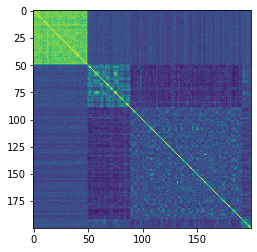

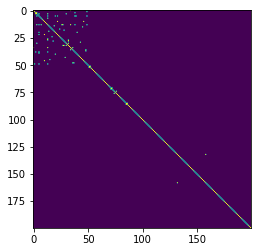

In [50]:
pred_image_features = np.concatenate([test_pred_features_avg, train_cat_image_features_avg], axis=0)
pred_labels = test_cat + train_cat#  + test_cat
pred_corr = np.corrcoef(pred_image_features)
print(len(test_cat), len(train_cat))
print(pred_corr)

plt.imshow(pred_corr)
plt.show()
plt.imshow((pred_corr>0.8).astype(np.int8))
plt.show()

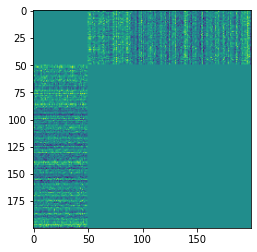

Goldfish : ['praying_mantis', 'watermelon', 'chimpanzee', 'sunflower', 'glass']
owl : ['light_bulb', 'glass', 'sunflower', 'praying_mantis', 'horseshoe_crab']
nan : ['watermelon', 'chimpanzee', 'horse', 'bear', 'tricycle']
duck : ['tricycle', 'sunflower', 'harmonica', 'praying_mantis', 'airship']
swan : ['frog_2', 'frog_1', 'praying_mantis', 'chimpanzee', 'Loudspeaker']
nan : ['xylophone', 'bear', 'glass', 'hourglass', 'frisbee']
crab : ['sunflower', 'building', 'hourglass', 'antenna', 'light_bulb']
orca : ['snake', 'chimpanzee', 'light_bulb', 'frog_2', 'sunflower']
leopard : ['hourglass', 'bear', 'light_bulb', 'chimpanzee', 'balloon']
Bat : ['light_bulb', 'bowling', 'raccoon', 'basket_clam', 'tent']
fly : ['sunflower', 'ostrich', 'light_bulb', 'watermelon', 'chimpanzee']
butterfly : ['light_bulb', 'bowling', 'deer', 'rhinoceros', 'ostrich']
goat : ['hourglass', 'sunflower', 'light_bulb', 'pinetree', 'cup']
camel : ['watermelon', 'light_bulb', 'sunflower', 'sward', 'bowling']
lama : ['

In [51]:
test_start_id = 0
test_end_id = len(test_cat)

pred_corr[:test_end_id, :test_end_id] = 0
pred_corr[test_end_id:, test_end_id:] = 0
pred_corr
plt.imshow(pred_corr)
plt.show()

pred_ranking = np.argsort(pred_corr, axis=1)[:,::-1]

# test corr
for i, row in enumerate(pred_ranking[test_start_id:test_end_id]):
    print(pred_labels[i+test_start_id], ':' ,[pred_labels[r] for r in row[:5]])

# Train Pred, Test Pred, Train Image (AVG), Test Image

192 300 150 50
[[ 1.          0.36796146  0.13956184 ... -0.03239857 -0.04200627
  -0.01892287]
 [ 0.36796146  1.          0.19242024 ...  0.00416006 -0.10979325
   0.03669652]
 [ 0.13956184  0.19242024  1.         ... -0.02434575 -0.07359535
  -0.03937232]
 ...
 [-0.03239857  0.00416006 -0.02434575 ...  1.          0.19233846
   0.11884173]
 [-0.04200627 -0.10979325 -0.07359535 ...  0.19233846  1.
   0.19470739]
 [-0.01892287  0.03669652 -0.03937232 ...  0.11884173  0.19470739
   1.        ]]


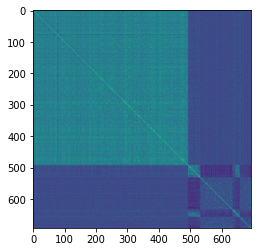

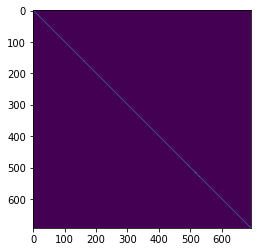

In [52]:
pred_image_features = np.concatenate([train_pred_features, test_pred_features, train_cat_image_features_avg, test_image_features], axis=0)
pred_labels = train_pred_cats + test_pred_cats + train_cat + test_cat
pred_corr = np.corrcoef(pred_image_features)
print(len(train_pred_cats), len(test_pred_cats), len(train_cat), len(test_cat))
print(pred_corr)

plt.imshow(pred_corr)
plt.show()
plt.imshow((pred_corr>0.8).astype(np.int8))
plt.show()

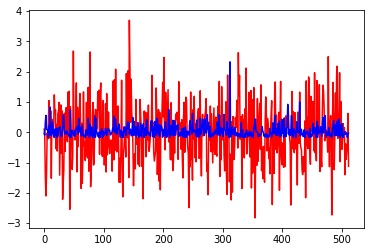

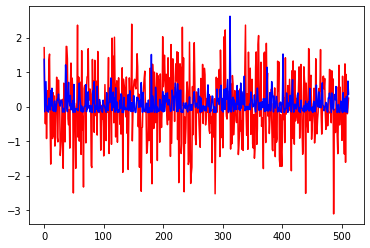

In [55]:
plt.plot(np.arange(test_image_features.shape[1]), test_image_features[test_labels[0],:], 'r-')
plt.plot(np.arange(test_pred_features.shape[1]), test_pred_features[0,:], 'b-')
plt.show()

plt.plot(np.arange(train_image_features.shape[1]), train_image_features[train_labels[0]//8,:], 'r-')
plt.plot(np.arange(train_pred_features.shape[1]), train_pred_features[0,:], 'b-')
plt.show()

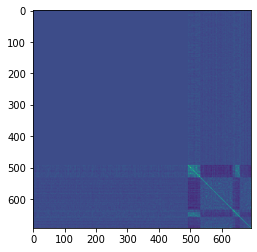

Bat : ['man_with_hammock', 'tent', 'camel', 'segway', 'grasshopper']
camel : ['turtle', 'watermelon', 'earphone', 'glass', 'octopus']
grave : ['basketball_ring', 'tricycle', 'telescope', 'bottle', 'camera']
knob : ['watermelon', 'tennis_ball', 'glass', 'tv', 'chimpanzee']
nan : ['nan', 'guitar_pick', 'antenna', 'lama', 'sunflower']
iPod : ['TuningFork', 'camel', 'light_bulb', 'trilobite', 'hourglass']
leopard : ['umbrella', 'bottle', 'man_with_hammock', 'pool', 'fire_extinguisher']
buttery? : ['pedal', 'bear', 'frog_1', 'watermelon', 'roulette']
washing_machine : ['nan', 'Cannon', 'sunflower', 'umbrella', 'toaster2']
carrier : ['praying_mantis', 'person', 'antenna', 'Loudspeaker', 'tent']
beermug : ['bear', 'basketball_ring', 'Bat', 'segway', 'basket_clam']
nan : ['frying_pan', 'shredder', 'cochlea', 'mouse_PC', 'teapot']
tower : ['knife', 'knife2', 'penguin', 'skunk', 'pedal']
washing_machine : ['light_bulb', 'tie', 'hat', 'pinetree', 'building']
Stained glass : ['nan', 'harmonica', '

In [56]:
test_start_id = len(train_pred_cats)
test_end_id = test_start_id + len(test_pred_cats)

pred_corr[:test_end_id, :test_end_id] = 0
plt.imshow(pred_corr)
plt.show()

pred_ranking = np.argsort(pred_corr, axis=1)[:,::-1]

# test corr
for i, row in enumerate(pred_ranking[test_start_id:test_end_id]):
    print(pred_labels[i+test_start_id], ':' ,[pred_labels[r] for r in row[:5]])

In [57]:
# train corr
train_start_id = 0
for i, row in enumerate(pred_ranking[train_start_id:train_start_id+50]):
    print(pred_labels[i+train_start_id], ':' ,[pred_labels[r] for r in row[:5]])

turtle : ['turtle', 'octopus', 'watermelon', 'horseshoe_crab', 'cochlea']
bonsai : ['cochlea', 'mouse_PC', 'fungi', 'penguin', 'skunk']
knife2 : ['keyboard', 'nan', 'man_with_hammock', 'goat', 'zebra']
glass : ['sunflower', 'light_bulb', 'cochlea', 'mouse_PC', 'glass']
submachine_gun : ['nan', 'frisbee', 'tent', 'tie', 'lighthouse']
shirt : ['tent', 'person', 'light_bulb', 'praying_mantis', 'man_with_hat']
bike : ['Snowmobile', 'chimpanzee', 'tricycle', 'lama', 'toaster']
TuningFork : ['glass', 'harmonica', 'nan', 'TuningFork', 'driver']
game : ['umbrella', 'binocular', 'light_bulb', 'flashlight', 'tire']
tv : ['praying_mantis', 'nan', 'boat', 'helicopter', 'camera']
sward : ['sward', 'cochlea', 'knob', 'pedal', 'lathe_machine']
can : ['light_bulb', 'cd', 'horn', 'can', 'nan']
can : ['nan', 'nan', 'butterfly', 'tricycle', 'balloon']
stearing : ['ostrich', 'bear', 'deer', 'basketball_ring', 'leopard']
teapot : ['basket_clam', 'raccoon', 'hourglass', 'nan', 'flower_pot']
building : ['fro

In [58]:

def calc_similarity(x, y):
    batch_size = len(x)
    gt_size = len(y)
    
    similarity = torch.empty(batch_size, gt_size).to('cuda')
    for i in range(batch_size):
        for j in range(gt_size):
            similarity[i, j] = (x[i] @ y[j]) / max((x[i].norm() * y[j].norm()), 1e-8)
    return similarity.cpu().numpy()

In [59]:
import torch
import sys
sys.path.append('../')
from meg_decoding.models import get_model, Classifier

class Args:
    normalize_image_features= False
args = Args()

classifier = Classifier(args)
Z = torch.Tensor(train_pred_features).to('cuda')

Y = []
for l in train_labels:
    Y.append(train_image_features[l-1])
Y = np.stack(Y, axis=0)
Y = torch.Tensor(Y).to('cuda')

trainTop1acc, trainTop10acc = classifier(Z, Y, test=False)
print('TRAIN: Acc Top1/10', trainTop1acc, trainTop10acc)

similarity = calc_similarity(Z, Y)
acc_tmp = np.zeros(len(similarity))
for i in range(len(similarity)):
    acc_tmp[i] = np.sum(similarity[i,:] < similarity[i,i]) / (len(similarity)-1)
print('TRAIN: Similarity Acc', np.mean(acc_tmp))

TRAIN: Acc Top1/10 0.6666666865348816 0.9375
TRAIN: Similarity Acc 0.9853021378708552


In [60]:
np.sum(similarity[i,:] < similarity[i,i])

191

In [61]:
Z = torch.Tensor(test_pred_features_avg).to('cuda')

Y = []
for l in np.arange(1,51):# test_labels:
    Y.append(test_image_features[l-1])
Y = np.stack(Y, axis=0)
Y = torch.Tensor(Y).to('cuda')

testTop1acc, testTop10acc, testTopKacc = classifier(Z, Y, test=False, top_k=25)
print('TEST(AVG): Acc Top1/10/K', testTop1acc, testTop10acc, testTopKacc)


similarity = calc_similarity(Z, Y)
acc_tmp = np.zeros(len(similarity))
for i in range(len(similarity)):
    acc_tmp[i] = np.sum(similarity[i,:] < similarity[i,i]) / (len(similarity)-1)
print('TEST(AVG): Similarity Acc', np.mean(acc_tmp))

TEST(AVG): Acc Top1/10/K 0.019999999552965164 0.32 0.54
TEST(AVG): Similarity Acc 0.5155102040816326


In [62]:
mean_Acc = {'testTop1acc': [], 'testTop10acc':[], 'testTopKacc':[],'test Similarityacc':[]}
Zs=[]
Ys=[]
for sess in range(6):
    Z = []
    Y = []
    for l in range(1, 51): # test_labels:
        target_id = np.where(test_labels==l)[0][sess]
        Z.append(test_pred_features[target_id])
        Y.append(test_image_features[l-1])
    Y = np.stack(Y, axis=0)
    Y = torch.Tensor(Y).to('cuda')
    Z = np.stack(Z, axis=0)
    Z = torch.Tensor(Z).to('cuda')
    Zs.append(Z.unsqueeze(0))
    Ys.append(Y.unsqueeze(0))

    testTop1acc, testTop10acc, testTopKacc = classifier(Z, Y, test=False, top_k=25)
    print('TEST: Acc Top1/10/K', testTop1acc, testTop10acc, testTopKacc)


    similarity = calc_similarity(Z, Y)
    acc_tmp = np.zeros(len(similarity))
    for i in range(len(similarity)):
        acc_tmp[i] = np.sum(similarity[i,:] < similarity[i,i]) / (len(similarity)-1)
    print('TEST: Similarity Acc', np.mean(acc_tmp))
    mean_Acc['testTop1acc'].append(testTop1acc)
    mean_Acc['testTop10acc'].append(testTop10acc)
    mean_Acc['testTopKacc'].append(testTopKacc)
    mean_Acc['test Similarityacc'].append(np.mean(acc_tmp))

print({k:'{:.3f}'.format(np.mean(v)) for k, v in mean_Acc.items()})


Z = torch.cat(Zs, axis=0).mean(dim=0)
Y = torch.cat(Ys, axis=0).mean(dim=0)
similarity = calc_similarity(Z, Y)
acc_tmp = np.zeros(len(similarity))
for i in range(len(similarity)):
    acc_tmp[i] = np.sum(similarity[i,:] < similarity[i,i]) / (len(similarity)-1)
print('TEST: (AVG)Similarity Acc', np.mean(acc_tmp))

TEST: Acc Top1/10/K 0.0 0.16 0.46
TEST: Similarity Acc 0.5077551020408163
TEST: Acc Top1/10/K 0.0 0.18 0.52
TEST: Similarity Acc 0.49795918367346936
TEST: Acc Top1/10/K 0.019999999552965164 0.18 0.42
TEST: Similarity Acc 0.4706122448979591
TEST: Acc Top1/10/K 0.03999999910593033 0.2 0.56
TEST: Similarity Acc 0.5453061224489797
TEST: Acc Top1/10/K 0.05999999865889549 0.34 0.6
TEST: Similarity Acc 0.550204081632653
TEST: Acc Top1/10/K 0.0 0.2 0.56
TEST: Similarity Acc 0.5073469387755102
{'testTop1acc': '0.020', 'testTop10acc': '0.210', 'testTopKacc': '0.520', 'test Similarityacc': '0.513'}
TEST: (AVG)Similarity Acc 0.5155102040816326


In [63]:
similarity

array([[-0.05286709, -0.0330622 , -0.02971671, ...,  0.00778109,
        -0.05837752, -0.02244263],
       [-0.00175766, -0.04036688, -0.06846678, ..., -0.01900831,
        -0.025181  , -0.0361926 ],
       [ 0.01132893, -0.01116514,  0.0068013 , ..., -0.02158575,
        -0.07323602, -0.02004133],
       ...,
       [ 0.00744497, -0.00774237, -0.02196336, ..., -0.00637732,
        -0.02821182, -0.07562105],
       [-0.00865966, -0.06237145, -0.01914276, ...,  0.00587261,
        -0.0176643 , -0.00213297],
       [ 0.01403732, -0.04614489, -0.03762517, ..., -0.02528448,
        -0.06757275,  0.01953033]], dtype=float32)

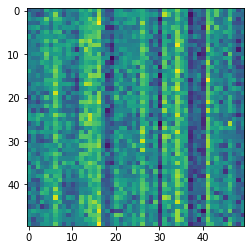

In [64]:
similarity = calc_similarity(Z, Y)
plt.imshow(similarity)

In [65]:
print(np.sort(similarity, axis=1)[:,::-1])
sorted_similarity = np.argsort(similarity, axis=1)[:, ::-1]

[[ 0.07811476  0.0762556   0.06676015 ... -0.06404212 -0.06637167
  -0.06727783]
 [ 0.10484349  0.09008161  0.08452075 ... -0.05853303 -0.06846678
  -0.10877159]
 [ 0.1067533   0.0742688   0.07134086 ... -0.07323602 -0.09312805
  -0.10860907]
 ...
 [ 0.09223431  0.07800243  0.07307668 ... -0.05624556 -0.07562105
  -0.07929761]
 [ 0.09314198  0.09209663  0.07670547 ... -0.07457788 -0.07910059
  -0.0961978 ]
 [ 0.13051413  0.07288393  0.06907146 ... -0.06757275 -0.07942246
  -0.09006844]]


In [66]:
for i, sim in enumerate(sorted_similarity[:50,:]):
    print(train_pred_cats[i], ': ', [train_pred_cats[s] for s in sim[:5]],  [train_labels[s] for s in sim[:5]])

turtle :  ['light_bulb', 'tire', 'elephant', 'teapot', 'flower_pot'] [716, 423, 303, 1021, 823]
bonsai :  ['frog_1', 'light_bulb', 'bike', 'elephant', 'flower_pot'] [16, 716, 765, 303, 823]
knife2 :  ['light_bulb', 'teapot', 'submachine_gun', 'camera', 'flower_pot'] [716, 1021, 660, 413, 823]
glass :  ['light_bulb', 'injection', 'flower_pot', 'building', 'driver'] [716, 1011, 823, 943, 897]
submachine_gun :  ['flower_pot', 'elephant', 'building', 'teapot', 'tire'] [823, 303, 937, 1021, 423]
shirt :  ['tire', 'light_bulb', 'injection', 'flower_pot', 'building'] [423, 716, 1011, 823, 943]
bike :  ['tire', 'light_bulb', 'teapot', 'building', 'stearing'] [423, 716, 1021, 943, 986]
TuningFork :  ['teapot', 'can', 'tire', 'stearing', 'soccer_ball'] [1021, 957, 423, 986, 950]
game :  ['tire', 'building', 'light_bulb', 'teapot', 'flower_pot'] [423, 943, 716, 1021, 823]
tv :  ['stearing', 'flower_pot', 'injection', 'tire', 'frog_1'] [986, 823, 1011, 423, 16]
sward :  ['submachine_gun', 'camera'

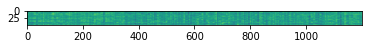

In [34]:
similarity = calc_similarity(Z, torch.Tensor(train_image_features).cuda())
plt.imshow(similarity)